<a href="https://colab.research.google.com/github/devorahst/Test/blob/main/DVariable.ProfileOfSTRDNAloci/Section_1_BathedAndTimeElapsed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Upload and Clean Dataset

## Part 1. Upload
First, we must download the dataset. Upon running the cell, you will be prompted to login to your Gmail account. You will then be provided with a one-time use code to copy and paste into the slot below. After hitting enter, the dataset will load into this script.

In [ ]:
#pulls up our SAK dataset
#@title uploader
file_id = "1lMSXIdMUQTZVOOk2wG-1awvPEIlypfxV" #@param {type:"string"}
!pip install -U -q PyDrive

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

from google.colab import auth
auth.authenticate_user()

from googleapiclient.discovery import build
drive_service = build('drive', 'v3')

import io
from googleapiclient.http import MediaIoBaseDownload

request = drive_service.files().get_media(fileId=file_id)
downloaded = io.BytesIO()
downloader = MediaIoBaseDownload(downloaded, request)
done = False
while done is False:
  _, done = downloader.next_chunk()

fileId = drive.CreateFile({'id': file_id }) #DRIVE_FILE_ID is file id example: 1iytA1n2z4go3uVCwE_vIKouTKyIDjEq
print(fileId['title'])  
fileId.GetContentFile(fileId['title'])  # Save Drive file as a local file

DataFrame_corrected.csv


## Part 2. Set Up
1. Install and Import - Install SciKit-Learn and import necessary packages
2. Clean the Dataset - Label the columns and replace null values with "No Response" and sort features based on type.
3. Display Cleaned Dataset

###1. Install and Import

In [ ]:
pip install -U scikit-learn

In [ ]:
from scipy.stats import chi2_contingency
from scipy import stats
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# To change scientific numbers to float
np.set_printoptions(formatter={'float_kind':'{:f}'.format})


###2. Read in File and Clean the Dataset



#####**Label the columns and replace null values with "No Response"**


In [ ]:
with open(fileId['title'], encoding="utf8", errors='ignore') as f:
  df = pd.read_csv(f)

df = df.astype('string')
df = df.replace(r'^\s+$', np.nan, regex=True)
df = df.replace({np.nan: "No Response"})

df = df[df['ProfileofSTRDNAloci'] != "No Response"]
df = df[df['CODISNDISeligibleProfile'] != "No Response"]

df = df[df['Site'] != '6'] #filter out other state data
df = df[df['Gender'] == '1']  #dataframe containing information from only female respondents

#Add col showing STRDNA profile eligible/not eligible
def makeContingency(row):
  good_values = ['1','2']  
  eligibility = row["ProfileofSTRDNAloci"]
  if eligibility in good_values:
    return "1"
  else:
    return "0"


df['STRDNAEligible'] = df.apply(makeContingency, axis=1)

predictedVariable = "STRDNAEligible"

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (1,2,3,4,9,239,240,255,257,258,261,269,283,285,290,294,301,313) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


#####**Sort Features Based on Type**
Because our features are not all categorical, we cannot calculate each feature's p-value using the same method. We must sort our features into numerical, categorical, and string entries and then apply the correct method to obtain each p-value. For categorical features, we will run chi-square tests while we will use analysis of variance (ANOVA) with T-Testing for numerical features. The meaning of the variables are all described in the [code book](https://drive.google.com/file/d/18PDTuK0lshc193lXA3b7UDgcRzMoEEGA/view?usp=sharing).

In [ ]:
predictedFeatures = ['CODISNDISeligibleProfile', 'SDISeligibleprofile']  

numericalFeatures = ['Age', 'Timebetweenassaultandexaminhours', 'PainLevel', 'MulitipleSuspectNumber', 
                     'NumberofUnknownresponses', 'NumberAssaultiveActs', 'Numberofphysicalinjuries', 'Numberofgentialinjuries',
                     'NumberOFitemsTested', 'TimeBetweenCollectAndDNAext', 'TimeBetweenSubmissionANDtesting', 'NumberOfswabsQuantMaleDNA',
                     'NumberOfswabsDNAanalysis', 'NumberofSTRDNAloci', 'NumberOFswabsSTRDNAprofile', 'NumberOfYSTRDNAloci']

categoricalFeatures = ['Site', 'EXAMbySANE', 'YearKitCollected', 'KITbroughtTOcrimelab', 'KITlengthofSubmissionTime',
                       'UnderAge18', 'Gender', 'ExamDeclined', 'Noninterview', 'Race', 'PriorHxofSAover14',
                       'PriorHxofSAunder14', 'Student', 'Military', 'Pain', 'PainLocation1','PainLocation2', 
                       'PainLocation3', 'PainLocation4','PainTreatment', 'PermanentAddress', 'CurrentPhysicalmedprob',
                       'MedProbChronic', 'MedProbInfection', 'MedProbBlood', 'MedProbCardiac', 'MedProbEar', 'MedProbEndocrine',
                       'MedProbEye', 'MedProbGI', 'MedProbGU', 'MedProbGYN', 'MedProbImmune', 'MedProbMusculoskeletal', 'MedProbNeurological',
                       'MedProbOral', 'MedProbRenal', 'MedProbRespiratory', 'MedProbSkin', 'MedProbOther', 'Medication',
                       'PsychotropicMEDuse', 'PsychotropicANTIPSYCHOTICSatypical', 'PsychotropicSTIMULANTuse', 'PsychotropicANTIANXIETY', 
                       'PsychotropicANTIDEPRESSANTS', 'PsychotropicANTISEIZUREbipolar', 'PsychotropicADDICTIONmeds','PsychotropicSLEEPaid', 'PsychotropicOTHER', 
                       'PsychotropicANTIPSYCHOTICStypical', 'PolypharmacyPsychMeds', 'ImmunizationstatusTETANUS', 'ReceivedTetanus',
                       'ImmunizationstatusHEP', 'ReceivedHepB', 'Sexualcontactwithin120hours', 'Selfdisclosurementalillness', 'MIdepression',
                       'MIanxiety', 'MIPTSD', 'MIpsychoticDisorders', 'MIadhd', 'MIpersonalitydisorder', 'MIbipolar', 'MIeatingdisorder', 'MIdrugalcoholdisorders', 
                       'MIother', 'SelfDiscolsureMentalillnessORuseofpsychotropics', 'OnlineMeetingOFsuspect', 'Suspectrelationship',
                       'Locationofassault', 'PatientActionScratch', 'PatientActionBite', 'PatientActionHit', 'PatientActionKick', 'PatientActionOther',
                       'Suspectrace', 'SuspectactionVERBAL', 'SuspectactionsGRABBEDHELD', 'SuspectactionsPHYSICALBLOWS', 'SuspectactionsSTRANGLEDCHOKED',
                       'SuspectactionsWEAPON', 'SuspectactionsRESTRAINTS', 'SuspectactionsBURNED', 'MultipleSuspects', 'SuspectedDrugfacilitated',
                       'Patientdruguse', 'PatientETOHuse', 'Suspectdruguse', 'SuspectETOHuse', 'PatientSuspectETOHordrug', 'LossOFconsciousnessORawareness',
                       'OneORmoreunknownanswer', 'Unknownanswerto4ormorequestions', 'UnknownanswertoALL', 'AsleepANDawakenedtoassault', 'MemoryLoss',
                       'LossOfconsciousness', 'DecreasedAwareness', 'TonicImmobility', 'Detachment', 'NOSApatientsVAGINApenis', 'NOSApatientsVAGINAfingerhand',
                       'NOSApatientsVAGINAmouth', 'NOSApatientsVAGINAobject', 'NOSApatientsANUSpenis', 'NOSApatientsANUSfingerhand', 'NOSApatientsANUSmouth', 
                       'NOSApatientsANUSobject', 'NOSApatientsPENISgenitals', 'NOSApatientsPENISfinger', 'NOSApatientsPENISmouth', 'NOSApatientsPENISobject', 
                       'NOSApatientsMOUTHpenis', 'NOSApatientsMOUTHfinger', 'NOSApatientsMOUTHmouth', 'NOSApatientsMOUTHobject', 'SUSPECTmouthcontactGENITALS', 
                       'SUSPECTmouthcontactMOUTH', 'SUSPECTmouthcontactOTHER', 'SUSPECTmouthcontactOTHERsite', 'HANDSofSuspectBreast', 'HANDSofSuspectExtremities', 
                       'HANDSofSuspectOther', 'Ejaculation', 'CONDOMuse', 'LUBRICATIONuse', 'SuspectWASHEDpatient', 'SuspectINJUREDbypatient', 'PostassaultURINATED', 
                       'PostassaultDEFECATED', 'PostassaultDOUCHED', 'PostassaultVOMITED', 'PostassaultGARGLED', 'PostassaultBRUSHEDTEETH', 'PostassaultATEdrank', 
                       'PostassaultBATHED', 'PostassaultGENITALWIPE', 'PostassaultCHANGEDCLOTHING', 'PostassaultREMOVEDInserted', 'PhysicalORmentalimpairment', 'Physicalinjury', 
                       'LPIhead', 'LPIneck', 'LPIbreasts', 'LPIchestback', 'LPIabdomen', 'LPIextremities', 'TPIlaceration', 'TPIecchymosis', 'TPIabrasion', 'TPIredness', 
                       'TPIswelling', 'TPIbruise', 'TPIpetechiae', 'TPIincision', 'TPIavulsion', 'TPIdiscoloredmark', 'TPIpuncturewound', 'TPIfracture', 
                       'TPIbitemark', 'TPIburn', 'TPImissingorbrokenTEETH', 'TPIconjunctivalhemorrhage', 'Genitalinjury', 'LGIinnerthighs', 'LGIclitoralhoodclitoris', 
                       'LGIlabiamajora', 'LGIlabiaminora', 'LGIperiurethraltissueURETHRA', 'LGIperihymenaltissue', 'LGIhymen', 'LGIvagina', 'LGIcervix', 'LGIfossanavicularis', 
                       'LGIposteriorfourchette', 'LGIperineum', 'LGIperineum', 'LGIanalrectal', 'LGIbuttocks', 'LGImalePerianalperineum', 'LGIglanspenis', 'LGIpenileshaft', 
                       'LGImaleURETHRALmeatus', 'LGIscrotum', 'LGItestes', 'LGImaleanus', 'LGImalerectum', 'TGIlaceration', 'TGIecchymosis', 'TGIabrasion', 'TGIredness', 
                       'TGIswelling', 'TGIbruise', 'TGIpetechiae', 'TGIincision', 'TGIavulsion', 'TGIdiscoloredmark', 'TGIpuncturewound', 'ToludineDYEuptake', 'HIVnPEP', 
                       'UQuikcollected', 'Yscreen', 'NumberItemsWITH3cutoff', 'ItemsAnalyzed1', 'ItemsAnalyzed2', 'ItemsAnalyzed3', 'ItemsAnalyzed4', 'ItemsAnalyzed5', 
                       'ItemsAnalyzed6', 'ItemsAnalyzed7', 'ItemsAnalyzed8', 'ItemsAnalyzed9', 'ItemsAnalyzed10', 'TypesOFitemsTested', 'RandomSample20142015', 
                       'YearofDNAextraction', 'LocationOfTesting','DANYfundedSAK', 'DNAKitUsed', 'SerologyDoneBeforeDNA', 'QuantMaleDNAFound', 'QuantMaleSwabLoc1', 
                       'QuantMaleSwabLoc2', 'QuantMaleSwabLoc3', 'QuantMaleSwabLoc4', 'QuantMaleSwabLoc5', 'ProbableSTRDNAprofileOFsuspect', 'ProfileofSTRDNAloci', 'ProbableYSTRDNAprofile', 'ProfileOfYSTRDNAloci', 
                       'SwabLocationYSTRDNA', 'SecondSwabLocationYSTRDNA', 'SwabFromSuspectwithVictimDNA', 'ExcludeSuspect', 'ConsensualPartnerStandardSubmitted', 
                       'STRDNAProbableprofileTYPE', 'CODISprofileHit', 'STRDNAkitUsed', 'SUSPECTmouthcontactBREASTS', 'Swab1LocationSTRDNAprofile', 'Swab2LocationSTRDNAprofile',
                       'Swab3LocationSTRDNAprofile', 'SuspectStandardSubmitted', 'CODISNDISreasons', 'CODISSDISreasons']
swabToDNAFeatures = ['Swab1ToDNAanalysis', 'Swab2ToDNAanalysis', 'Swab3ToDNAanalysis', 'Swab4ToDNAanalysis']
#unusedFeatures and stringFeatures are columns that contain data that was relevant to medical professionals and for legal purposes, 
#but that aren't useful for our feature association or for predicting eligibility
unusedFeatures = ['filter_$', 'PainTreatmentYesNo', 'GenderMaleFemale', 'DVsuspect', 'RacePrimaryGroups', 'IPSAcombined', 'STRDNAcompleted', 
                  'PhysicalInjuryNOunknown', 'GenitalInjuryNOunknown']

stringFeatures = ['DeIdentifiedCase', 'Raceother', 'SchoolName', 'MilitaryBranchName', 'AddressIfnotPermanent', 'Currentmedprobtext',
                  'MedProbOtherText', 'Medicationtext', 'Sexualcontactwithin120hoursTYPE', 'SelfdisclosureMItype', 'OnlineMeetingName', 'SuspectrelationshipOTHER',
                  'LocationofassaultOTHER', 'Surfaceofassault', 'PatientActionOtherTEXT', 'SuspectraceOTHER', 'SuspectOTHERactions', 'NOSApatientsVAGINAobjectdescription',
                  'NOSApatientsANUSobjectdescription', 'NOSApatientsPENISobjectdescription', 'NOSApatientsMOUTHobjectdescription', 'EjaculationSITE', 'LUBRICATIONtype',
                  'SuspectINJUREDbypatientexplanation', 'Impairmentdescription', 'UBFSnumber', 'ISPnumber', 'DateSubmittedUBFS', 'DateofDNAextractionReport',
                  'BodySwabLocQuant', 'BodySwabDNAanalysis', 'BodySwabLocationSTRDNA', 'BodySwabYSTRDNA', 'ISPnotes2020', 'UBFSnotes2020', 'UBFSnotes2018', 'UBFSnotes2014']

###3. Display Cleaned Dataset

In [ ]:
df

,DeIdentifiedCase,Site,EXAMbySANE,YearKitCollected,KITbroughtTOcrimelab,KITlengthofSubmissionTime,Age,UnderAge18,Gender,ExamDeclined,Noninterview,Timebetweenassaultandexaminhours,Race,Raceother,PriorHxofSAover14,PriorHxofSAunder14,Student,SchoolName,Military,MilitaryBranchName,Pain,PainLevel,PainLocation1,PainLocation2,PainLocation3,PainLocation4,PainTreatment,PermanentAddress,AddressIfnotPermanent,CurrentPhysicalmedprob,Currentmedprobtext,MedProbChronic,MedProbInfection,MedProbBlood,MedProbCardiac,MedProbEar,MedProbEndocrine,MedProbEye,MedProbGI,MedProbGU,...,SecondSwabLocationYSTRDNA,BodySwabYSTRDNA,SwabFromSuspectwithVictimDNA,ExcludeSuspect,SuspectStandardSubmitted,ConsensualPartnerStandardSubmitted,CODISNDISeligibleProfile,SDISeligibleprofile,STRDNAProbableprofileTYPE,CODISprofileHit,ISPnotes2020,UBFSnotes2020,UBFSnotes2018,UBFSnotes2014,filter_$,PainTreatmentYesNo,GenderMaleFemale,DVsuspect,RacePrimaryGroups,IPSAcombined,STRDNAcompleted,PhysicalInjuryNOunknown,GenitalInjuryNOunknown,CODISNDISreasons,CODISSDISreasons,STRDNAkitUsed,ProfileofSTRDNAloci,SwabToDNAanalysisNoquantmaleDNAfound,SwabToDNAanalysisVaginal,SwabToDNAanalysisCervical,SwabToDNAanalysisPerianal,SwabToDNAanalysisRectal,SwabToDNAanalysisOral,SwabToDNAanalysisBody,SwabToDNAanalysisUnderwear,SwabToDNAanalysisOtherClothing,SwabToDNAanalysisBedding,SwabToDNAanalysisCondom,SwabToDNAanalysisTampon,STRDNAEligible
0,FT988320,1,1,1,1,1,17,1,1,0,No Response,48,3,No Response,4,4,No Response,No Response,No Response,No Response,No Response,No Response,No Response,No Response,No Response,No Response,No Response,No Response,No Response,0,No Response,0,0,0,0,0,0,0,0,0,...,No Response,No Response,0,0,0,0,1,1,1,0,No Response,No Response,DNA report found 5/16/19.,Left message for detective requesting standard...,0,No Response,1,No Response,3,2,1,1,1,1,1,2,1,0,0,0,0,0,0,1,0,0,0,0,0,1
1,LZ866552,1,1,1,1,2,27,0,1,0,No Response,3,2,No Response,4,4,No Response,No Response,No Response,No Response,No Response,No Response,No Response,No Response,No Response,No Response,No Response,No Response,No Response,0,No Response,0,0,0,0,0,0,0,0,0,...,No Response,No Response,0,0,0,0,0,0,3,4,No Response,No Response,DNA report found 5/16/19.,Detective said no DNA analysis is needed at th...,0,No Response,1,No Response,2,1,1,1,0,4,4,2,4,0,0,0,0,0,0,1,0,0,0,0,0,0
2,FT988772,1,1,1,1,1,23,0,1,0,No Response,6,1,No Response,4,4,No Response,No Response,No Response,No Response,No Response,No Response,No Response,No Response,No Response,No Response,No Response,No Response,No Response,0,No Response,0,0,0,0,0,0,0,0,0,...,No Response,No Response,0,0,0,0,1,1,1,0,No Response,No Response,DNA report found 5/16/19.,"Detective was called with results, no call bac...",0,No Response,1,No Response,1,2,1,1,1,1,1,2,1,0,0,0,0,1,0,0,0,0,0,0,0,1
3,UM632222,1,1,1,1,1,19,0,1,0,No Response,14,1,No Response,4,4,No Response,No Response,No Response,No Response,No Response,No Response,No Response,No Response,No Response,No Response,No Response,No Response,No Response,1,"Asthma, mono",1,1,1,0,0,0,0,0,0,...,No Response,No Response,0,0,0,0,1,1,1,0,No Response,No Response,DNA report found 5/16/19.,"Vaginal, perianal, breast, neck and chest swab...",0,No Response,1,No Response,1,2,1,1,1,1,1,2,1,0,0,0,0,0,0,1,0,0,0,0,0,1
4,TT976221,1,1,1,1,1,16,1,1,0,No Response,23,1,No Response,4,4,No Response,No Response,No Response,No Response,No Response,No Response,No Response,No Response,No Response,No Response,No Response,No Response,No Response,1,Strep throat,0,1,0,0,0,0,0,0,0,...,No Response,No Response,0,0,0,0,0,0,No Response,4,No Response,No Response,DNA report found 5/16/19.,"No male DNA found, no further testing done",0,No Response,1,No Response,1,1,No Response,1,0,5,5,No Response,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

#Time Between Assault and Exam and Bathing
The next cells will sort the dataset into bathed/not bathed and group into time groups

##Set-up

###Bathed

In [ ]:
eligible = df[df[predictedVariable] != 'No Response']

currentVariable = 'PostassaultBATHED'

bathed = eligible[eligible[currentVariable] == '1']
bathed = bathed[bathed['Timebetweenassaultandexaminhours'] != 'No Response']
bathed['Timebetweenassaultandexaminhours'] = bathed['Timebetweenassaultandexaminhours'].apply(pd.to_numeric, errors='coerce')
bathed = bathed[bathed['Timebetweenassaultandexaminhours'] <= 200]

bathed[predictedVariable] = np.where((bathed[predictedVariable] == '0'), 'Not Eligible', bathed[predictedVariable])
bathed[predictedVariable] = np.where((bathed[predictedVariable] == '1'), 'Eligible', bathed[predictedVariable])

In [ ]:
print(bathed['Timebetweenassaultandexaminhours'].max())

199.5


In [ ]:
#Split age groups into buckets
eligibleBathed = {}
numEB = []

timeHolder = 0
day = 0
while timeHolder < 120:
  currentGroup = bathed[(bathed['Timebetweenassaultandexaminhours'] >= timeHolder) & (bathed['Timebetweenassaultandexaminhours'] < timeHolder + 24)]
  numEB.append(len(currentGroup))
  eligibleBathed[day] = ((len(currentGroup[currentGroup[predictedVariable] == 'Eligible']) / len(currentGroup)) * 100)

  timeHolder += 24
  day += 1

currentGroup = bathed[(bathed['Timebetweenassaultandexaminhours'] >= timeHolder)]

numEB.append(len(currentGroup))
eligibleBathed["5+"] = ((len(currentGroup[currentGroup[predictedVariable] == 'Eligible']) / len(currentGroup)) * 100)

timeHolder += 24
day += 1

###Not Bathed

In [ ]:
eligible = df[df[predictedVariable] != 'No Response']
currentVariable = 'PostassaultBATHED'
notBathed = eligible[eligible[currentVariable] == '0']
notBathed = notBathed[notBathed['Timebetweenassaultandexaminhours'] != 'No Response']
notBathed['Timebetweenassaultandexaminhours'] = notBathed['Timebetweenassaultandexaminhours'].apply(pd.to_numeric, errors='coerce')
notBathed = notBathed[notBathed['Timebetweenassaultandexaminhours'] <= 200]

notBathed[predictedVariable] = np.where((notBathed[predictedVariable] == '0'), 'Not Eligible', notBathed[predictedVariable])
notBathed[predictedVariable] = np.where((notBathed[predictedVariable] == '1'), 'Eligible', notBathed[predictedVariable])

In [ ]:
print(notBathed['Timebetweenassaultandexaminhours'].max())

173.0


In [ ]:
#Split age groups into buckets
eligibleNotBathed = {}
numNB = []

timeHolder = 0
day = 0
while timeHolder < 120:
  currentGroup = notBathed[(notBathed['Timebetweenassaultandexaminhours'] >= timeHolder) & (notBathed['Timebetweenassaultandexaminhours'] < timeHolder + 24)]
  numNB.append(len(currentGroup))
  eligibleNotBathed[day] = ((len(currentGroup[currentGroup[predictedVariable] == 'Eligible']) / len(currentGroup)) * 100)

  timeHolder += 24
  day += 1
 
currentGroup = notBathed[(notBathed['Timebetweenassaultandexaminhours'] >= timeHolder)]
numNB.append(len(currentGroup))
eligibleNotBathed["5+"] = ((len(currentGroup[currentGroup[predictedVariable] == 'Eligible']) / len(currentGroup)) * 100)

timeHolder += 24
day += 1

##Plot
This cell creates the lineplot showing time between assault and exam, bathing, and CODIS eligibility.

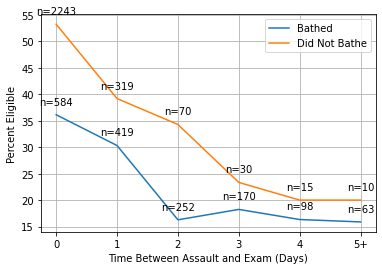

In [ ]:
timeGroupBathed = list(eligibleBathed.keys())         
numEligibleBathed = list(eligibleBathed.values())

timeGroupNotBathed = list(eligibleNotBathed.keys())         
numEligibleNotBathed = list(eligibleNotBathed.values())

# print(numEligible)

import matplotlib.pyplot as plt
import numpy as np


plt.plot(timeGroupBathed, numEligibleBathed, label='Bathed')
plt.plot(timeGroupNotBathed, numEligibleNotBathed, label='Did Not Bathe')

plt.xlabel("Time Between Assault and Exam (Days)")
plt.ylabel("Percent Eligible");
plt.legend()
plt.grid(b=True)

i = 0
for x in eligibleBathed:
    y = eligibleBathed[x]

    label = "n=" + str(numEB[i])
    i += 1
    plt.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center')

i = 0
for x in eligibleNotBathed:
    y = eligibleNotBathed[x]

    label = "n=" + str(numNB[i])
    i += 1
    plt.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center')

plt.savefig('bathing_and_time_lineplot.pdf', dpi=600)
plt.show()